# Lab 5 Từ Xây dựng Mô hình đến Đánh giá

Thời lượng: 120 phút

## Mục tiêu

Sau khi hoàn thành lab này, bạn sẽ có thể:

-   Lập mô hình
-   Đánh giá mô hình


## Mục lục

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Tóm tắt lại](#0)<br>
2.  [Mô hình hóa dữ liệu](#2)<br>
3.  [Đánh giá mô hình](#4)<br>
    </div>
    <hr>


# Tóm tắt lại <a id="0"></a>

Trong lab **Từ Hiểu biết đến Chuẩn bị**, chúng ta đã khám phá dữ liệu và chuẩn bị cho việc lập mô hình.


Dữ liệu được tổng hợp bởi nhà nghiên cứu Yong-Yeol Ahn, người đã thu thập hàng chục nghìn công thức nấu ăn (món ăn và nguyên liệu) từ 3 trang web khác nhau, đó là:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab4_fig1_allrecipes.png" width=500>

[www.allrecipes.com](http://www.allrecipes.com?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork-20083987&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab4_fig2_epicurious.png" width=500>

[www.epicurious.com](http://www.epicurious.com?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork-20083987&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab4_fig3_menupan.png" width=500>

[www.menupan.com](http://www.menupan.com?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork-20083987&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)


Để biết thêm thông tin về Yong-Yeol Ahn và nghiên cứu của anh ấy, bạn có thể đọc bài báo của anh ấy trên[Flavor Network and the Principles of Food Pairing](http://yongyeol.com/papers/ahn-flavornet-2011.pdf?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork-20083987&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork-20083987&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<strong> Lưu ý quan trọng:</strong> Xin lưu ý rằng bạn không cần biết cách lập trình trong Python. Đoạn code sau đây nhằm minh họa các giai đoạn hiểu dữ liệu và chuẩn bị dữ liệu, vì vậy hoàn toàn không sao nếu bạn không hiểu từng dòng code riêng lẻ. Chúng ta có một khóa học đầy đủ về lập trình bằng Python, <a href="http://cocl.us/PY0101EN_DS0103EN_LAB4_PYTHON_edX"><strong> Python dành cho Khoa học dữ liệu </strong> </a>, cũng được cung cấp trên Coursera. Vì vậy, hãy hoàn thành khóa học Python nếu bạn muốn học cách lập trình bằng Python.

### Sử dụng notebook này:

Để chạy bất kỳ cell code nào sau đây, bạn có thể nhập **Shift + Enter** để tính toán code trong một cell.


Tải xuống thư viện và các tệp đi kèm mà chúng ta sẽ cần để chạy lab này.

In [2]:
import pandas as pd # import library to read data into dataframe
pd.set_option("display.max_columns", None)
import numpy as np # import numpy library
import re # import library for regular expression
import random # library for random number generation


Chúng tôi đã đặt dữ liệu trên máy chủ IBM để thuận tiện cho bạn, vì vậy hãy tải dữ liệu xuống từ máy chủ và đọc nó vào khung dữ liệu có tên **recipes**.


In [3]:
# Điền code vào đây
recipes = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/data/recipes.csv")

print("Data read into dataframe!") # takes about 30 seconds

Data read into dataframe!


Nhấp đúp vào __đây__ để xem lời giải.
<!--
read_csv
-->

Chúng ta sẽ lặp lại các bước tiền xử lý đã triển khai trong lab **Từ Tìm hiểu đến Chuẩn bị** để chuẩn bị dữ liệu cho việc lập mô hình. Để biết thêm chi tiết về việc chuẩn bị dữ liệu, vui lòng tham khảo lab **Từ Tìm hiểu đến Chuẩn bị**.


In [4]:
# fix name of the column displaying the cuisine
column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names

# convert cuisine names to lower case
recipes["cuisine"] = recipes["cuisine"].str.lower()

# make the cuisine names consistent
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "jewish"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"


# remove data for cuisines with < 50 recipes:
recipes_counts = recipes["cuisine"].value_counts()
cuisines_indices = recipes_counts > 50

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])
recipes = recipes.loc[recipes["cuisine"].isin(cuisines_to_keep)]

# convert all Yes's to 1's and the No's to 0's
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

<hr>


# Mô hình hóa Dữ liệu <a id="2"></a>


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab4_fig4_flowchart_data_modeling.png" width=500>


Tải xuống và cài đặt thêm các thư viện và phần phụ thuộc để xây dựng cây quyết định.


In [5]:
!pip3 install python-graphviz --yes



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --yes


In [6]:
!pip3 install graphviz


In [8]:
# import decision trees scikit-learn libraries
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import sys
# sys.path.append('c:\\users\\nguye\\miniconda3\\lib\\site-packages')
import graphviz

from sklearn.tree import export_graphviz

import itertools

Hãy kiểm tra lại dữ liệu!


In [9]:
recipes.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

## [bamboo_tree] Chỉ có Ẩm thực châu Á và Ấn Độ

Ở đây, chúng ta đang tạo một cây quyết định cho các công thức nấu ăn chỉ cho một số món ăn Châu Á (Hàn Quốc, Nhật Bản, Trung Quốc, Thái Lan) và Ấn Độ. Lý do là vì cây quyết định không chạy tốt khi dữ liệu thiên về một nền ẩm thực, trong trường hợp này là các món ăn Mỹ. Có một phương án là loại trừ các món ăn Mỹ khỏi phân tích của chúng ta hoặc chỉ xây dựng cây quyết định cho các tập hợp con dữ liệu khác nhau. Hãy thực hiện giải pháp này.


Hãy xây dựng cây quyết định bằng cách sử dụng dữ liệu liên quan đến các món ăn Châu Á và Ấn Độ và đặt tên cho cây quyết định của chúng ta là _bamboo_tree_.

In [10]:
# select subset of cuisines
asian_indian_recipes = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]
cuisines = asian_indian_recipes["cuisine"]
ingredients = asian_indian_recipes.iloc[:,1:]

In [11]:
# Điền code vào đây
bamboo_tree = tree.DecisionTreeClassifier(max_depth=3)

Nhấp đúp vào __đây__ để xem lời giải.
<!--
DecisionTreeClassifier
-->

In [12]:
bamboo_tree.fit(ingredients, cuisines)

print("Decision tree model saved to bamboo_tree!")

Decision tree model saved to bamboo_tree!


Nhấp đúp vào __đây__ để xem lời giải.
<!--
fit(ingredients, cuisines)
-->

Hãy vẽ biểu đồ cây quyết định và xem nó trông như thế nào.

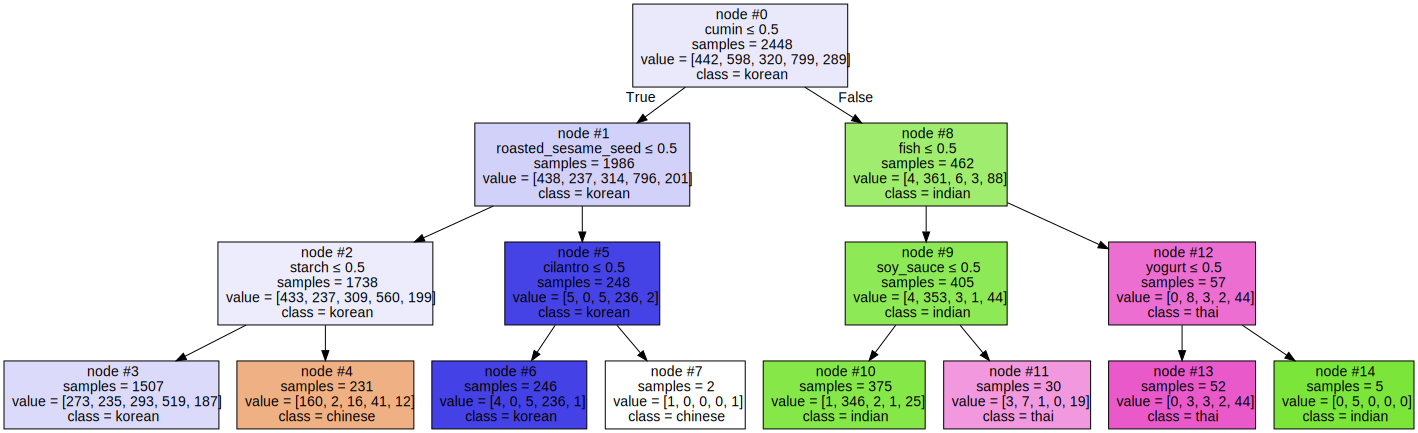

In [13]:
export_graphviz(bamboo_tree,
                feature_names=list(ingredients.columns.values),
                out_file="bamboo_tree.dot",
                class_names=np.unique(cuisines),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("bamboo_tree.dot") as bamboo_tree_image:
    bamboo_tree_graph = bamboo_tree_image.read()
graphviz.Source(bamboo_tree_graph)

Cây quyết định cho rằng:

- Nếu một công thức có chứa _cumin_ và _fish_ và **không có** _yoghurt_, thì rất có thể đó là công thức **Thái**.
- Nếu một công thức có chứa _cumin_ nhưng **không có** _fish_ và **không có** _soy_sauce_, thì rất có thể đó là một công thức **Ấn Độ**.


Bạn có thể phân tích các nhánh còn lại của cây để đưa ra các quy tắc tương tự nhằm xác định ẩm thực của các công thức nấu ăn khác nhau.


Hãy thoải mái chọn một tập hợp con các món ăn khác và xây dựng một cây quyết định về công thức nấu ăn của chúng. Bạn có thể chọn một số món ăn Châu Âu và xây dựng một cây quyết định để khám phá các thành phần tạo nên sự khác biệt giữa chúng.


# Đánh giá mô hình <a id="4"></a>


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab4_fig5_flowchart_evaluation.png" width=500>


Để đánh giá mô hình ẩm thực châu Á và Ấn Độ, chúng ta sẽ chia tập dữ liệu của mình thành tập huấn luyện (training set) và tập thử nghiệm (test set). Chúng ta sẽ xây dựng cây quyết định bằng cách sử dụng tập huấn luyện. Sau đó, chúng ta sẽ kiểm tra mô hình trên tập thử nghiệm và so sánh các món ăn mà mô hình dự đoán với các món ăn thực tế.

Trước tiên, hãy tạo một khung dữ liệu mới chỉ sử dụng dữ liệu liên quan đến các món ăn Châu Á và Ấn Độ, và chúng ta hãy gọi khung dữ liệu mới là **bamboo**.


In [14]:
bamboo = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]

Hãy xem có bao nhiêu công thức nấu ăn của từng nền ẩm thực.


In [15]:
# Điền code vài đây
bamboo["cuisine"].value_counts()

cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64

Nhấp đúp vào __đây__ để xem lời giải.
<!--
value_counts
-->

Hãy xóa 30 công thức nấu ăn từ mỗi nền ẩm thực để sử dụng làm tập thử nghiệm và đặt tên cho tập thử nghiệm này là **bamboo_test**.


In [16]:
# set sample size
sample_n = 30

Tạo khung dữ liệu chứa 30 công thức nấu ăn từ mỗi nền ẩm thực, được chọn ngẫu nhiên.


In [17]:
# take 30 recipes from each cuisine
random.seed(1234) # set random seed

# Điền code vào đây
bamboo_test = bamboo.groupby("cuisine", group_keys=False).apply(lambda x: x.sample(sample_n))

bamboo_test_ingredients = bamboo_test.iloc[:,1:] # ingredients
bamboo_test_cuisines = bamboo_test["cuisine"] # corresponding cuisines or labels

Nhấp đúp vào __đây__ để xem lời giải.
<!--
groupby
-->

Kiếm tra thấy mỗi nền ẩm thực có 30 công thức.


In [18]:
# check that we have 30 recipes from each cuisine
bamboo_test["cuisine"].value_counts()

cuisine
chinese     30
indian      30
japanese    30
korean      30
thai        30
Name: count, dtype: int64

Tiếp theo, hãy tạo tập huấn luyện bằng cách xóa tập kiểm tra khỏi tập dữ liệu **bamboo** và gọi tập huấn luyện **bamboo_train**.

In [19]:
bamboo_test_index = bamboo.index.isin(bamboo_test.index)
bamboo_train = bamboo[~bamboo_test_index]

bamboo_train_ingredients = bamboo_train.iloc[:,1:] # ingredients
bamboo_train_cuisines = bamboo_train["cuisine"] # corresponding cuisines or labels

Kiểm tra để đảm bảo rằng hiện có _ít hơn_ 30 công thức nấu ăn cho mỗi nền ẩm thực.


In [20]:
bamboo_train["cuisine"].value_counts()

cuisine
korean      769
indian      568
chinese     412
japanese    290
thai        259
Name: count, dtype: int64

Hãy xây dựng cây quyết định bằng cách sử dụng tập huấn luyện **bamboo_train**, và đặt tên cho cây được tạo là **bamboo_train_tree** để dự đoán.


In [21]:
bamboo_train_tree = tree.DecisionTreeClassifier(max_depth=15)

Nhấp đúp vào __đây__ để xem lời giải.
<!--
DecisionTreeClassifier
-->

In [22]:
bamboo_train_tree.fit(bamboo_train_ingredients, bamboo_train_cuisines)

print("Decision tree model saved to bamboo_train_tree!")

Decision tree model saved to bamboo_train_tree!


Nhấp đúp vào __đây__ để xem lời giải.
<!--
fit
-->

Hãy dựng cây quyết định và khám phá nó.


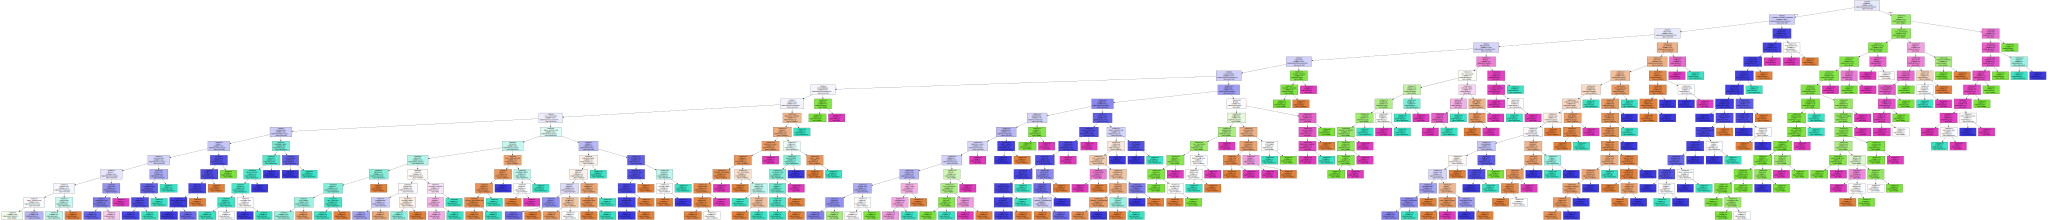

In [23]:
export_graphviz(bamboo_train_tree,
                feature_names=list(bamboo_train_ingredients.columns.values),
                out_file="bamboo_train_tree.dot",
                class_names=np.unique(bamboo_train_cuisines),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("bamboo_train_tree.dot") as bamboo_train_tree_image:
    bamboo_train_tree_graph = bamboo_train_tree_image.read()
graphviz.Source(bamboo_train_tree_graph)

Bây giờ chúng ta đã xác định kỹ hơn cây của mình, tạo ra nhiều nút quyết định (decision node) hơn.


#### Bây giờ, hãy kiểm tra mô hình của chúng ta trên dữ liệu thử nghiệm.

In [24]:
bamboo_pred_cuisines = bamboo_train_tree.predict(bamboo_test_ingredients)

Nhấp đúp vào __đây__ để xem lời giải.
<!--
predict
-->

Để định lượng mức độ mà cây quyết định có thể xác định chính xác từng công thức của nền ẩm thực nào, chúng ta sẽ tạo ra một ma trận nhầm lẫn (confusion matrix) trình bày một bản tóm tắt về số lượng công thức từ mỗi nền ẩm thực được phân loại chính xác. Nó cũng giúp phân biệt những nền ẩm thực nào đang bị nhầm lẫn với các nền ẩm thực khác.


Vì vậy, hãy tạo ma trận nhầm lẫn để xem cây quyết định có thể phân loại chính xác các công thức trong **bamboo_test** như thế nào.


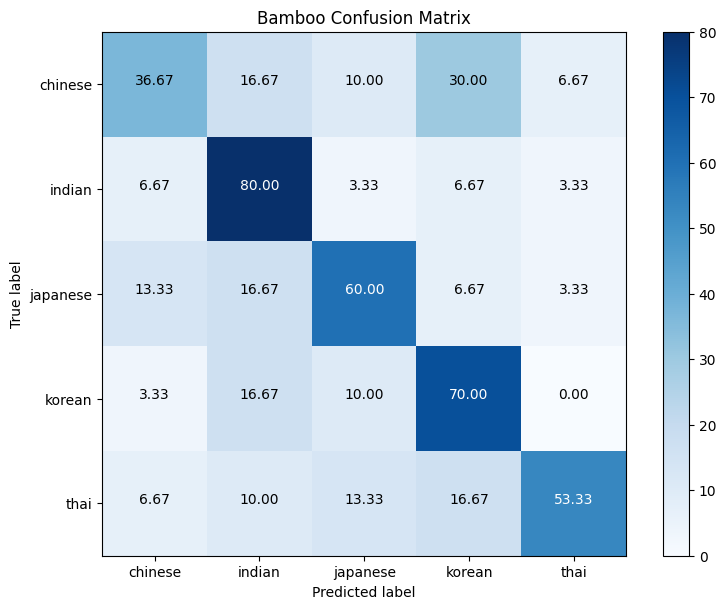

In [25]:
test_cuisines = np.unique(bamboo_test_cuisines)
bamboo_confusion_matrix = confusion_matrix(bamboo_test_cuisines, bamboo_pred_cuisines, labels = test_cuisines)
title = 'Bamboo Confusion Matrix'
cmap = plt.cm.Blues

plt.figure(figsize=(8, 6))
bamboo_confusion_matrix = (
    bamboo_confusion_matrix.astype('float') / bamboo_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100

plt.imshow(bamboo_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)

fmt = '.2f'
thresh = bamboo_confusion_matrix.max() / 2.
for i, j in itertools.product(range(bamboo_confusion_matrix.shape[0]), range(bamboo_confusion_matrix.shape[1])):
    plt.text(j, i, format(bamboo_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if bamboo_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

Sau khi chạy đoạn code trên, bạn sẽ nhận được một ma trận nhầm lẫn tương tự như sau:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab4_fig6_confusion_matrix.png" width=500>


Các hàng đại diện cho các nền ẩm thực thực tế từ tập dữ liệu và các cột đại diện cho những nền ẩm thực được dự đoán. Mỗi hàng phải tổng lại thành 100%. Theo ma trận nhầm lẫn này, chúng ta thực hiện các quan sát sau:

- Sử dụng hàng đầu tiên trong ma trận nhầm lẫn, 60% công thức **Chinese** trong **bamboo_test** được phân loại chính xác theo cây quyết định trong khi 37% công thức **Chinese** bị phân loại sai thành **Korean**  và 3% bị phân loại sai thành **Indian**.

- Sử dụng hàng Ấn Độ, 77% công thức **Indian** trong **bamboo_test** được phân loại chính xác theo cây quyết định và 3% công thức **Indian** bị phân loại sai thành **Chinese**, 13 % bị phân loại sai là **Korean** và 7% bị phân loại sai là ** Thái **

**Xin lưu ý** rằng vì cây quyết định được tạo bằng cách lấy mẫu ngẫu nhiên các điểm dữ liệu trong tập huấn luyện, do đó bạn có thể không nhận được kết quả giống nhau mỗi khi tạo cây quyết định ngay cả khi sử dụng cùng một tập huấn luyện. Tuy nhiên, hiệu suất vẫn có thể so sánh được! Vì vậy, đừng lo lắng nếu bạn nhận được những con số hơi khác trong ma trận nhầm lẫn của bạn với những con số được hiển thị ở trên.

Sử dụng ma trận nhầm lẫn tham chiếu, có bao nhiêu công thức **Japanese** được phân loại chính xác bằng cây quyết định của chúng ta?


Đáp án của bạn: 36.67%


Nhấp đúp vào **đây** để xem lời giải

<!-- Đáp án đúng là:
36.67%.
-->


Cũng sử dụng ma trận nhầm lẫn tham chiếu, có bao nhiêu công thức **Korean** bị phân loại nhầm thành **Japanese**?


Đáp án của bạn: 3.33%



Nhấp đúp vào **đây** để xem lời giải

<!-- Đáp án đúng là:
3.33%.
-->


Nền ẩm thực nào có số lượng công thức nấu ăn được phân loại đúng theo cây quyết định ít nhất bằng cách sử dụng ma trận nhầm lẫn tham chiếu?


Đáp án của bạn: Japanese



Nhấp đúp vào **đây** để xem lời giải

<!-- Đáp án đúng là:
Ẩm thực Nhật, với chỉ 36.67%.
-->


<br>
<hr>


### Cảm ơn bạn đã hoàn thành lab này!

Nguồn: IBM
